In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import gmaps
import os

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_key import gkey
from api_key import weather_key
gmaps.configure(api_key=gkey)

# Save config information.
map_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# Build partial query URL
map_query_url = f"{map_url}&key={gkey}&address="

# Input File (CSV)
input_data_file_city = r"C:\Users\micha\Documents\AirQuality\annual_aqi_by_cbsa_2019.csv"
input_data_file_county = r"C:\Users\micha\Documents\AirQuality\annual_aqi_by_county_2019.csv"

aqi_city = pd.read_csv(input_data_file_city)
aqi_county = pd.read_csv(input_data_file_county)

In [2]:
#CREATING DATA BY STATE


aqi_county_groups = aqi_county.set_index('State').groupby(['State'])

# Get Average data by State
good_days = aqi_county_groups["Good Days"].mean()
moderate_days = aqi_county_groups["Moderate Days"].mean()
unhealthy_days = aqi_county_groups["Unhealthy Days"].mean()
very_unhealthy_days = aqi_county_groups["Very Unhealthy Days"].mean()
hazardous_days = aqi_county_groups["Hazardous Days"].mean()
days_co = aqi_county_groups["Days CO"].mean()
days_no2 = aqi_county_groups["Days NO2"].mean()
days_ozone = aqi_county_groups["Days Ozone"].mean()
days_so2 = aqi_county_groups["Days SO2"].mean()

# Create DataFrame
aqi_state_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2                                  
                             })

aqi_state_summary.head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Alabama,142.687500,32.937500,0.062500,0.000000,0.000000,0.062500,0.062500,105.187500,4.625000
Alaska,157.500000,25.333333,1.333333,0.000000,0.000000,0.500000,2.666667,52.833333,0.166667
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
Arkansas,146.384615,32.615385,0.000000,0.000000,0.000000,0.076923,0.153846,88.538462,0.000000
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736


In [3]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Good Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Maine,257.600000,13.300000,0.1,0.0,0.0,0.300000,5.000000,209.400000,0.000000
North Dakota,250.000000,22.500000,0.1,0.0,0.0,0.100000,2.000000,221.000000,5.700000
New York,237.000000,22.903226,0.0,0.0,0.0,0.258065,3.709677,179.419355,27.258065
Massachusetts,215.538462,25.153846,0.0,0.0,0.0,0.153846,4.923077,192.923077,0.000000
Mississippi,211.300000,42.300000,0.0,0.0,0.0,0.100000,0.100000,144.300000,0.000000


In [4]:
# Top 5 States with Days CO
aqi_state_summary.sort_values(by='Days CO', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Puerto Rico,89.000000,19.000000,0.2,2.6,2.0,22.300000,13.300000,9.800000,10.300000
Ohio,183.357143,41.309524,0.0,0.0,0.0,4.000000,4.119048,133.261905,20.595238
Indiana,190.275000,35.100000,0.0,0.0,0.0,1.075000,0.125000,157.050000,13.750000
District Of Columbia,171.000000,98.000000,1.0,0.0,0.0,1.000000,21.000000,182.000000,0.000000
Vermont,167.000000,14.666667,0.0,0.0,0.0,0.666667,0.000000,151.666667,0.000000


In [5]:
# Top 5 States with Days NO2
aqi_state_summary.sort_values(by='Days NO2', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
District Of Columbia,171.000000,98.000000,1.0,0.0,0.0,1.000000,21.000000,182.000000,0.000000
Hawaii,187.750000,4.500000,0.0,0.0,0.0,0.250000,19.250000,37.500000,22.500000
New Jersey,140.125000,32.812500,0.0,0.0,0.0,0.312500,16.562500,107.687500,0.000000
Virginia,145.470588,11.941176,0.0,0.0,0.0,0.205882,14.235294,83.147059,15.794118
Puerto Rico,89.000000,19.000000,0.2,2.6,2.0,22.300000,13.300000,9.800000,10.300000


In [6]:
# Top 5 States with higher than normal Ozone
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Utah,192.357143,75.357143,0.571429,0.071429,0.0,0.214286,9.928571,243.357143,0.071429
Delaware,208.333333,64.000000,0.000000,0.000000,0.0,0.333333,1.333333,223.333333,0.000000
North Dakota,250.000000,22.500000,0.100000,0.000000,0.0,0.100000,2.000000,221.000000,5.700000
Maine,257.600000,13.300000,0.100000,0.000000,0.0,0.300000,5.000000,209.400000,0.000000
Massachusetts,215.538462,25.153846,0.000000,0.000000,0.0,0.153846,4.923077,192.923077,0.000000


In [7]:
# Top 5 States with Days SO2
aqi_state_summary.sort_values(by='Days SO2', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
West Virginia,180.562500,15.250000,0.062500,0.0,0.0,0.375000,0.000000,116.062500,49.625000
Texas,152.042553,38.319149,0.255319,0.0,0.0,0.170213,1.127660,102.170213,33.638298
Illinois,173.740741,47.333333,0.111111,0.0,0.0,0.111111,2.777778,131.629630,28.296296
Missouri,131.454545,23.318182,3.954545,0.0,0.0,0.090909,1.863636,89.500000,27.590909
New York,237.000000,22.903226,0.000000,0.0,0.0,0.258065,3.709677,179.419355,27.258065


In [8]:
#CREATING DATA BY CITY

# Data is not collected for all 365 days by each city so an accurate picture cannot be attained with certainty. 
#This has to be taken into consideration when looking at results

#collected data percentage 
aqi_city["Year Coverage"] = aqi_city["Days with AQI"] / 365
aqi_city["Days Ozone Percent"] = aqi_city["Days Ozone"]/aqi_city["Days with AQI"]

# Cities with best data coverage for evaluation (atleast 70% or higher data collected in 365 days)  
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
coverage_df = pd.DataFrame(coverage)

# Top 5 cities with best air quality
coverage_df.sort_values(['Days Ozone'], ascending=[False]).head()

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Year Coverage,Days Ozone Percent
373,"Price, UT",39220,2019,304,204,99,1,0,0,0,...,67,47,0,4,300,0,0,0,0.832877,0.986842
449,"St. George, UT",41100,2019,304,235,69,0,0,0,0,...,61,46,0,0,299,0,5,0,0.832877,0.983553
74,"Cedar City, UT",16260,2019,304,275,29,0,0,0,0,...,50,43,0,8,281,0,15,0,0.832877,0.924342
162,"Flagstaff, AZ",22380,2019,273,209,64,0,0,0,0,...,61,46,0,0,273,0,0,0,0.747945,1.000000
199,"Harrison, AR",25460,2019,273,256,16,1,0,0,0,...,49,37,0,0,273,0,0,0,0.747945,1.000000


In [9]:
# The original imported dataset for AQI does not have Latitude and Longitude for each city.  In order to map it, lat & Lng
# is pulled from google

available_cities = []
state = []
lats = []
lngs = []
medianAQI = []
days_ozone = []
hazardous_days = []
percentile = []

print("----------Pulling City Lat and Lng data------------")

#loop through all the cities from the imported dataset
for i in range (len(aqi_city['CBSA'])):
    try:
        #handle spaces in city names
        response = requests.get(map_query_url + aqi_city['CBSA'][i].replace(" ","+")).json()

        #gather city data
        available_cities.append(aqi_city['CBSA'][i])
        
        #get state from city name
        state.append(aqi_city['CBSA'][i].rsplit(", ")[1])
        
        #get lat & Lng from json response
        lat = round(response['results'][0]['geometry']['location']['lat'], 2)
        lng = round(response['results'][0]['geometry']['location']['lng'], 2)
        lats.append(lat)
        lngs.append(lng)
        
        #collect medianAQI for found cities
        medianAQI.append(aqi_city['Median AQI'][i])
        
        #collect days ozone for found cities
        days_ozone.append(aqi_city['Days Ozone'][i])
        
        #collect hazardous days for found cities
        hazardous_days.append(aqi_city['Hazardous Days'][i])
        
        #collect percentile AQI 
        percentile.append(aqi_city['90th Percentile AQI'][i])

        #print city data as its aquired
        print(aqi_city['CBSA'][i] + ", Lat:" + str(lat) + ", Lng:" + str(lng))
              
    except Exception:
        #print city name that was not found
        print(aqi_city['CBSA'][i] + " not found!")

print("-------------Data Read Completed-------------")

available_city_data = {
    "City":available_cities,
    "State": state,
    "Lat":lats,
    "Lng":lngs,
    "AQI": medianAQI,
    "Days Ozone": days_ozone,
    "Hazardous Days": hazardous_days,
    "90th Percentile AQI": percentile
}

----------Pulling City Lat and Lng data------------
Aberdeen, SD, Lat:45.46, Lng:-98.49
Aberdeen, WA, Lat:46.98, Lng:-123.82
Adjuntas, PR, Lat:18.16, Lng:-66.72
Adrian, MI, Lat:41.9, Lng:-84.04
Akron, OH, Lat:41.08, Lng:-81.52
Albany, GA, Lat:31.58, Lng:-84.16
Albany, OR, Lat:44.64, Lng:-123.11
Albany-Schenectady-Troy, NY, Lat:42.76, Lng:-73.65
Albuquerque, NM, Lat:35.08, Lng:-106.65
Alexandria, LA, Lat:31.31, Lng:-92.45
Allentown-Bethlehem-Easton, PA-NJ, Lat:40.58, Lng:-75.5
Altoona, PA, Lat:40.52, Lng:-78.39
Amarillo, TX, Lat:35.22, Lng:-101.83
Americus, GA, Lat:32.07, Lng:-84.23
Anchorage, AK, Lat:61.22, Lng:-149.9
Ann Arbor, MI, Lat:42.28, Lng:-83.74
Appleton, WI, Lat:44.26, Lng:-88.42
Ardmore, OK, Lat:34.17, Lng:-97.14
Arkadelphia, AR, Lat:34.12, Lng:-93.05
Asheville, NC, Lat:35.6, Lng:-82.55
Ashtabula, OH, Lat:41.87, Lng:-80.79
Athens, OH, Lat:39.33, Lng:-82.1
Athens, TN, Lat:35.44, Lng:-84.59
Athens-Clarke County, GA, Lat:33.95, Lng:-83.36
Atlanta-Sandy Springs-Roswell, GA, Lat:

Harrisonburg, VA, Lat:38.45, Lng:-78.87
Hartford-West Hartford-East Hartford, CT, Lat:41.77, Lng:-72.67
Hattiesburg, MS, Lat:31.33, Lng:-89.29
Helena, MT, Lat:46.59, Lng:-112.04
Hermiston-Pendleton, OR, Lat:45.85, Lng:-119.31
Hickory-Lenoir-Morganton, NC, Lat:35.78, Lng:-81.34
Hilo, HI, Lat:19.72, Lng:-155.09
Hobbs, NM, Lat:32.7, Lng:-103.14
Holland, MI, Lat:42.79, Lng:-86.11
Homosassa Springs, FL, Lat:28.8, Lng:-82.58
Hot Springs, AR, Lat:34.5, Lng:-93.06
Houma-Thibodaux, LA, Lat:29.78, Lng:-90.81
Houston-The Woodlands-Sugar Land, TX, Lat:29.6, Lng:-95.62
Huntington, IN, Lat:40.88, Lng:-85.5
Huntington-Ashland, WV-KY-OH, Lat:38.33, Lng:-82.48
Huntsville, AL, Lat:34.73, Lng:-86.59
Idaho Falls, ID, Lat:43.49, Lng:-112.04
Indiana, PA, Lat:40.62, Lng:-79.15
Indianapolis-Carmel-Anderson, IN, Lat:39.84, Lng:-86.18
Iowa City, IA, Lat:41.66, Lng:-91.53
Ithaca, NY, Lat:42.44, Lng:-76.5
Jackson, MS, Lat:32.3, Lng:-90.18
Jackson, TN, Lat:35.61, Lng:-88.81
Jackson, WY-ID, Lat:43.48, Lng:-110.76
J

Rome, GA, Lat:34.26, Lng:-85.16
Rutland, VT, Lat:43.61, Lng:-72.97
Sacramento--Roseville--Arden-Arcade, CA, Lat:38.6, Lng:-121.38
Salem, OH, Lat:40.9, Lng:-80.86
Salem, OR, Lat:44.94, Lng:-123.04
Salinas, CA, Lat:36.68, Lng:-121.66
Salisbury, MD-DE, Lat:38.35, Lng:-75.6
Salt Lake City, UT, Lat:40.76, Lng:-111.89
San Antonio-New Braunfels, TX, Lat:29.42, Lng:-98.49
San Diego-Carlsbad, CA, Lat:33.16, Lng:-117.35
San Francisco-Oakland-Hayward, CA, Lat:37.77, Lng:-122.42
San Jose-Sunnyvale-Santa Clara, CA, Lat:37.37, Lng:-122.04
San Juan-Carolina-Caguas, PR, Lat:18.24, Lng:-66.04
San Luis Obispo-Paso Robles-Arroyo Grande, CA, Lat:35.13, Lng:-120.6
Sandpoint, ID, Lat:48.28, Lng:-116.55
Santa Cruz-Watsonville, CA, Lat:36.91, Lng:-121.76
Santa Fe, NM, Lat:35.69, Lng:-105.94
Santa Maria-Santa Barbara, CA, Lat:34.95, Lng:-120.44
Santa Rosa, CA, Lat:38.44, Lng:-122.71
Sault Ste. Marie, MI, Lat:46.5, Lng:-84.35
Savannah, GA, Lat:32.08, Lng:-81.09
Sayre, PA, Lat:41.98, Lng:-76.52
Scottsbluff, NE, 

In [10]:
map_ready_data = pd.DataFrame(available_city_data)
map_ready_data.head()

,City,State,Lat,Lng,AQI,Days Ozone,Hazardous Days,90th Percentile AQI
0,"Aberdeen, SD",SD,45.46,-98.49,24,0,0,56
1,"Aberdeen, WA",WA,46.98,-123.82,18,0,0,30
2,"Adjuntas, PR",PR,18.16,-66.72,18,0,0,44
3,"Adrian, MI",MI,41.90,-84.04,40,94,0,57
4,"Akron, OH",OH,41.08,-81.52,44,162,0,62


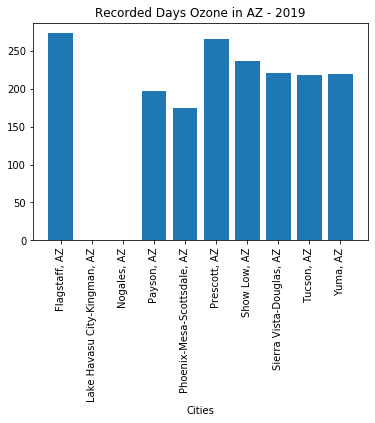

,City,State,Lat,Lng,AQI,Days Ozone,Hazardous Days,90th Percentile AQI
162,"Flagstaff, AZ",AZ,35.20,-111.65,46,273,0,61
254,"Lake Havasu City-Kingman, AZ",AZ,34.48,-114.32,15,0,0,29
332,"Nogales, AZ",AZ,31.34,-110.93,29,0,0,56
354,"Payson, AZ",AZ,34.23,-111.33,67,197,0,112
358,"Phoenix-Mesa-Scottsdale, AZ",AZ,33.42,-111.83,67,175,7,104
372,"Prescott, AZ",AZ,34.54,-112.47,44,266,0,58
433,"Show Low, AZ",AZ,34.25,-110.03,45,237,0,61
435,"Sierra Vista-Douglas, AZ",AZ,31.83,-109.95,47,221,0,71
469,"Tucson, AZ",AZ,32.22,-110.97,49,218,0,74
519,"Yuma, AZ",AZ,32.69,-114.63,46,219,0,71


In [11]:
# Hypothesis: An assumption can be made that In general, as concentrations of ground-level ozone increase, 
#both the number of people affected and the seriousness of the health effects increase. 
#Also, more people with lung disease visit doctors or emergency rooms and are admitted to the hospital. 
#When ozone levels are very high, everyone should be concerned about ozone exposure.
#Congested metropolitan city like Phoenix with high traffic volume and more industries would show moderate to Good Days of Ozone.
#(AQI between 0-50) than cities that have lower population, low traffic and no pollution creating industry

AZ_data = map_ready_data.loc[map_ready_data["State"] == 'AZ']

#create bar chart
x_axis = np.arange(len(AZ_data))
plt.bar(x_axis, AZ_data["Days Ozone"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, AZ_data["City"], rotation="vertical")
plt.title('Recorded Days Ozone in AZ - 2019')
plt.xlabel('Cities')
plt.show()
AZ_data

# Conclusion: Phoenix metropolitan area does experience Meduim to Good ozone exposure levels
# higher number of Good Days with low median AQI

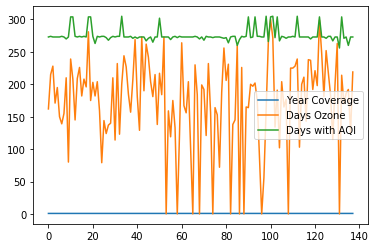

In [20]:
# line plot 

aqi_city["Year Coverage"] = aqi_city["Days with AQI"] / 365
aqi_city["Days Ozone Percent"] = aqi_city["Good Days"]/aqi_city["Days with AQI"]

# Cities with best data coverage for evaluation (atleast 70% or higher data collected in 365 days)  
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
coverage_df = pd.DataFrame(coverage)

line_plot_df = coverage_df.reset_index()
line_plot_df
line_plot_final = line_plot_df[["Year Coverage", "Days Ozone", "Days with AQI"]]
line_plot_final
lines = line_plot_final.plot.line()

![title](img\AZ.png)